In [2]:
import numpy as np
import pandas as pd
import keras
from keras import regularizers, optimizers
from keras.layers import Input, Conv1D, Dense, Flatten, Activation, UpSampling1D, Dropout, MaxPooling1D
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = pd.read_csv("datasets/creditcardfraud/creditcard.csv", sep=",", index_col=None)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
# df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [6]:
anomalies = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

anomalies.shape, normal.shape


((492, 31), (284315, 31))

In [227]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:100000]
# data_set = pd.concat([normal[:100000], anomalies])

x_train, x_test, y_train, y_test = train_test_split(data_set.drop(labels=['Time', 'Class'], axis=1), data_set["Class"], test_size = 0.4, random_state = 42)

# x_train = x_train.sort_values(by=['Time'])
# x_test = x_test.sort_values(by=['Time'])

# y_train = x_train["Class"]
# y_test = x_test["Class"]

# x_train = x_train.drop("Class", axis=1)
# x_test = x_test.drop("Class", axis=1)

x_train.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
230494,-0.276545,0.152249,-0.746430,-0.000412,0.055342,-0.818335,2.245274,-0.583996,-0.014015,-0.843813,...,0.793092,0.403042,1.065265,0.491758,-0.106354,-0.227865,-0.175286,0.122338,-0.008581,0.886177
120468,-0.635995,0.937224,0.894019,-0.282678,0.870458,0.258952,0.523983,0.183416,-0.652047,-0.292577,...,0.133684,-0.227255,-0.533720,0.054649,-0.877740,-0.088387,0.129143,0.151645,0.056006,-0.342914
243580,-0.722799,0.552173,1.681333,-0.467950,-0.060688,-0.438586,0.538035,0.088883,0.165231,-0.670188,...,0.173521,-0.151815,-0.401759,0.081893,-0.039776,-0.339847,0.019224,0.325773,0.202693,-0.153365
50344,-8.823586,-4.802248,-0.625810,1.926390,0.867728,0.210568,0.871081,-0.675730,2.055059,1.183268,...,-4.740466,-1.467400,0.602188,-0.037957,-0.166827,0.900979,-0.460280,-3.158685,3.391132,0.171240
207282,-0.367444,0.139925,0.049882,-3.437396,0.796969,-0.509638,0.880066,-0.294487,-3.456592,0.712622,...,-0.294195,-0.002527,0.296369,-0.690594,0.230372,1.296048,0.098084,-0.047541,0.010652,-0.325243
86498,-1.051204,1.075649,0.895192,1.175461,0.109368,0.474795,0.128613,0.676522,-0.574833,-0.037292,...,-0.035441,0.030416,0.305363,0.039111,-0.296289,-0.028537,-0.221573,0.198834,0.099191,-0.276906
173821,2.118725,-1.000434,-0.945111,-0.854738,-0.962619,-0.843449,-0.757489,-0.057646,-0.225261,0.983923,...,-0.125884,0.298042,0.809301,0.122253,0.012571,-0.104182,-0.113953,-0.031397,-0.069944,-0.263712
116964,1.282181,1.316520,-1.786951,1.526843,1.115290,-1.536503,0.794308,-0.378349,-0.474859,-1.561821,...,0.006869,-0.238196,-0.563665,-0.275400,-0.428346,0.937793,-0.264728,0.041901,0.092876,-0.347272
175112,0.097085,0.738706,-0.028076,-0.733596,0.596926,-0.767675,0.886724,-0.071083,0.249029,-0.361567,...,-0.124294,-0.325750,-0.831277,0.000006,-0.705955,-0.452698,0.186623,0.236241,0.086735,-0.345313
184917,1.916442,-0.925318,-1.099898,0.332324,-0.156315,0.626494,-0.575575,0.037021,-0.559896,1.098126,...,-0.348830,-0.276189,-0.380128,-0.016391,-1.491307,-0.043066,-0.614781,0.050350,-0.034129,0.110549


In [228]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(60000, 29)
y_train:(60000,)

x_test:(40000, 29)
y_test:(40000,)



In [229]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)
input_shape = (x_train.shape[1], 1)

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [230]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(60000, 29, 1)
y_train:(60000,)

x_test:(40000, 29, 1)
y_test:(40000,)

input_shape:(29, 1)



In [268]:

# encoded_dim = int(input_shape[0] / 6)
intermediate_dim1 = 20#int(input_shape[0]/1)
encoded_dim = 10#int(input_shape[0] / 3)
intermediate_dim2 = 20#int(input_shape[0]/1)

input_layer = Input(shape=(input_shape ))

#Series of temporal convolutional layers with dilations increasing by powers of 2.
conv_1 = Conv1D(filters=intermediate_dim1, kernel_size=6, dilation_rate=1,
                padding='causal', strides=2,input_shape=input_shape,
                kernel_regularizer=regularizers.l2(0.0005),
                activation='relu')(input_layer)

#Dropout layer after each 1D-convolutional layer
pool_1 = MaxPooling1D(pool_size=1, strides=2)(conv_1)



encoder = Dense(encoded_dim, activation='linear')(pool_1)


upsample_1 = UpSampling1D(size=2)(encoder)

conv_4 = Conv1D(filters=intermediate_dim2, kernel_size=6, dilation_rate=1,
                padding='causal',strides=1, kernel_regularizer=regularizers.l2(0.0005),
                activation='relu')(upsample_1)

upsample_2 = UpSampling1D(size=2)(conv_4)



flat = Flatten()(upsample_2)

output_layer = Dense(int(input_shape[0]))(flat)

# output_layer = Conv1D(filters=1, kernel_size=2, dilation_rate=1,
#                 padding='causal', strides=1,kernel_regularizer=regularizers.l2(0.05),
#                 activation='softmax')(conv_6)
#Flatten layer to feed into the output layer

#output_layer = Dense(1, activation='softmax')(conv_6)

TCN = Model(inputs=input_layer, outputs=output_layer)

In [269]:
TCN.compile(loss=keras.losses.mean_squared_error,
              optimizer=optimizers.Adam(lr=0.006),
           metrics=["accuracy"])

checkpointer = ModelCheckpoint(filepath="model_ED-TCN_creditcard_semi.h5",
                               verbose=0,
                               save_best_only=True)

TCN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 29, 1)             0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 15, 20)            140       
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 8, 20)             0         
_________________________________________________________________
dense_47 (Dense)             (None, 8, 10)             210       
_________________________________________________________________
up_sampling1d_47 (UpSampling (None, 16, 10)            0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 16, 20)            1220      
_________________________________________________________________
up_sampling1d_48 (UpSampling (None, 32, 20)            0         
__________

In [270]:
TCN.fit(x_train, x_train.reshape(x_train.shape[0], x_train.shape[1]),
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test,  x_test.reshape(x_test.shape[0], x_test.shape[1])),
          callbacks = [checkpointer])


Train on 60000 samples, validate on 40000 samples
Epoch 1/20
60000/60000 [==============================] - 8s - loss: 0.0639 - acc: 0.8704 - val_loss: 0.0119 - val_acc: 0.9291
Epoch 2/20
60000/60000 [==============================] - 5s - loss: 0.0118 - acc: 0.9369 - val_loss: 0.0085 - val_acc: 0.9535
Epoch 3/20
60000/60000 [==============================] - 6s - loss: 0.0090 - acc: 0.9459 - val_loss: 0.0065 - val_acc: 0.9537
Epoch 4/20
60000/60000 [==============================] - 6s - loss: 0.0105 - acc: 0.9401 - val_loss: 0.0072 - val_acc: 0.9411
Epoch 5/20
60000/60000 [==============================] - 7s - loss: 0.0079 - acc: 0.9471 - val_loss: 0.0123 - val_acc: 0.9286
Epoch 6/20
60000/60000 [==============================] - 7s - loss: 0.0066 - acc: 0.9506 - val_loss: 0.0038 - val_acc: 0.9708
Epoch 7/20
60000/60000 [==============================] - 7s - loss: 0.0088 - acc: 0.9495 - val_loss: 0.0285 - val_acc: 0.8752
Epoch 8/20
60000/60000 [==============================] - 7s 

In [332]:
y_test.shape

(40000,)

In [271]:
## EVAL ON X_TEST

predictions = TCN.predict(x_test)


pred_mse = np.mean(np.power(x_test.reshape(x_test.shape[0], x_test.shape[1]) - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,40000.000000,40000.0
mean,0.004183,0.0
std,0.023773,0.0
min,0.000399,0.0
25%,0.001359,0.0
50%,0.002090,0.0
75%,0.003460,0.0
max,1.917685,0.0


No handles with labels found to put in legend.


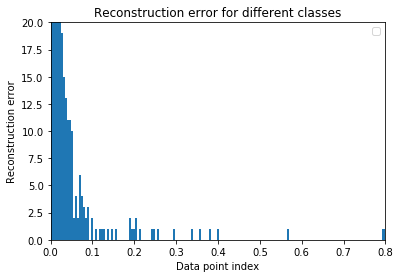

In [272]:
import matplotlib.pyplot as plt

threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

errors = []
for name, group in groups:
    errors.append(group.reconstruction_error)
errors = np.array(errors)
    

ax.legend()
plt.hist(np.array(errors)[0][:10000], bins=400)
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.axis([0,0.8,0,20])
plt.show();
# threshold = 0.06

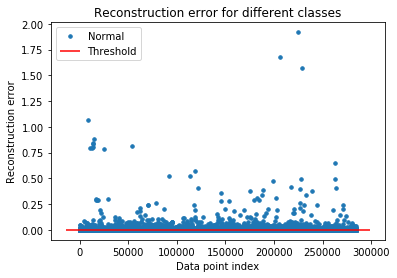

In [273]:
import matplotlib.pyplot as plt

threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

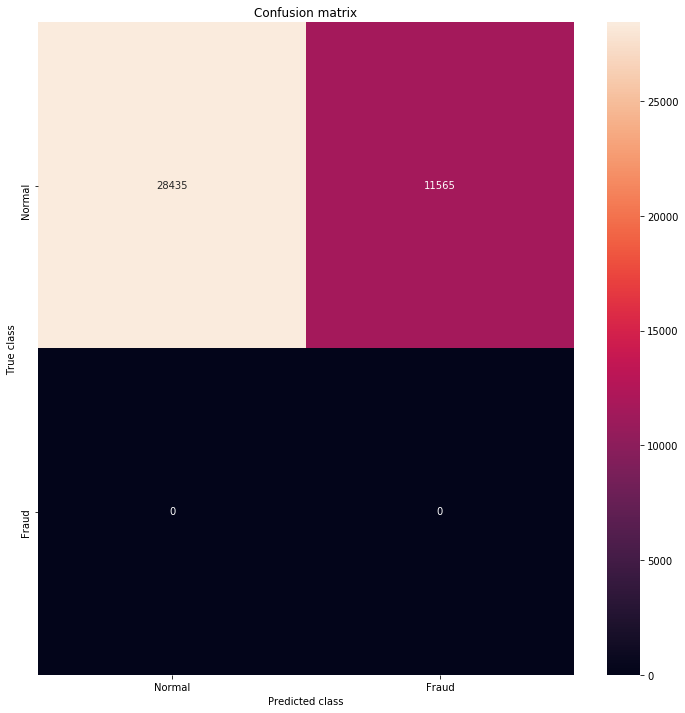

In [274]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [122]:
# counter = []

# for f in range(0, len(error_df)):
#     if error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
#         counter.append(1)
#     else:
#         counter.append(0)
        

In [123]:
# from sklearn.metrics import roc_auc_score

# auc = roc_auc_score( counter, y_test)
# print("AUC: {:.2%}".format (auc))

In [275]:
### EVAL ON ANOMALIES
anom_class = anomalies['Class']
anom = np.array(anomalies.drop(labels=['Time','Class'], axis=1))


anom_predictions = TCN.predict(anom.reshape(anom.shape[0], anom.shape[1], 1))

anom_mse = np.mean(np.power(anom.reshape(anom.shape[0], anom.shape[1]) - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,492.000000,492.0
mean,0.379452,1.0
std,0.470915,0.0
min,0.000783,1.0
25%,0.060743,1.0
50%,0.155458,1.0
75%,0.472431,1.0
max,2.340672,1.0


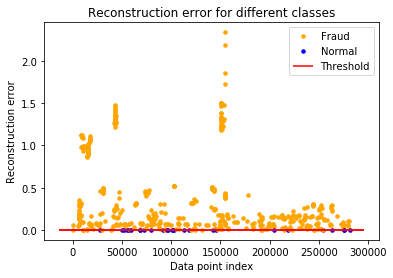

In [276]:
import matplotlib.pyplot as plt
# threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
# threshold = threshold.reconstruction_error
# threshold = threshold * 10
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

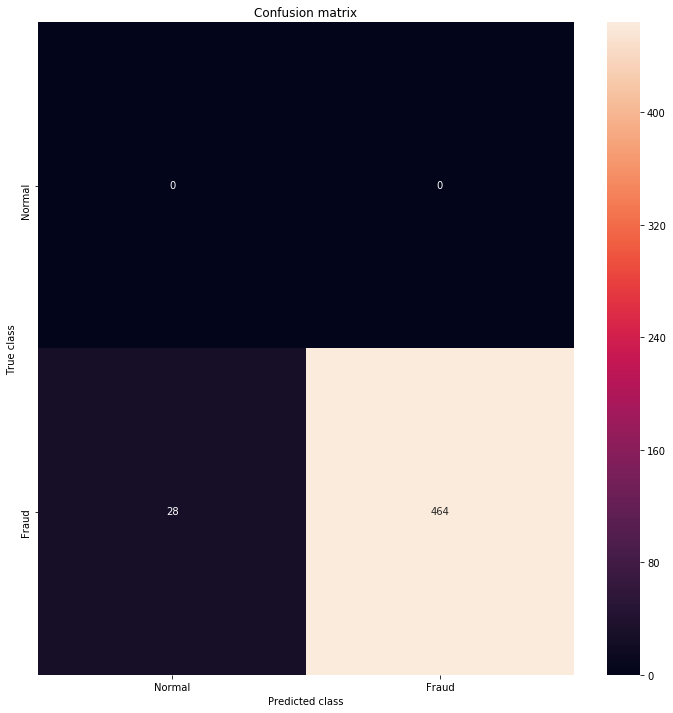

In [277]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in anom_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(anom_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [278]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.943089430894309


In [139]:
### TEST ON DF

points = np.array(df.drop(labels=['Time', 'Class'], axis=1))
truths = df['Class']

preds = TCN.predict(points.reshape(points.shape[0], points.shape[1], 1))

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()

,reconstruction_error,true_class
count,284807.000000,284807.000000
mean,0.001877,0.001727
std,0.045874,0.041527
min,0.000025,0.000000
25%,0.000099,0.000000
50%,0.000195,0.000000
75%,0.000501,0.000000
max,11.293754,1.000000


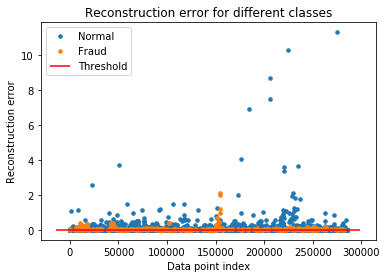

In [140]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

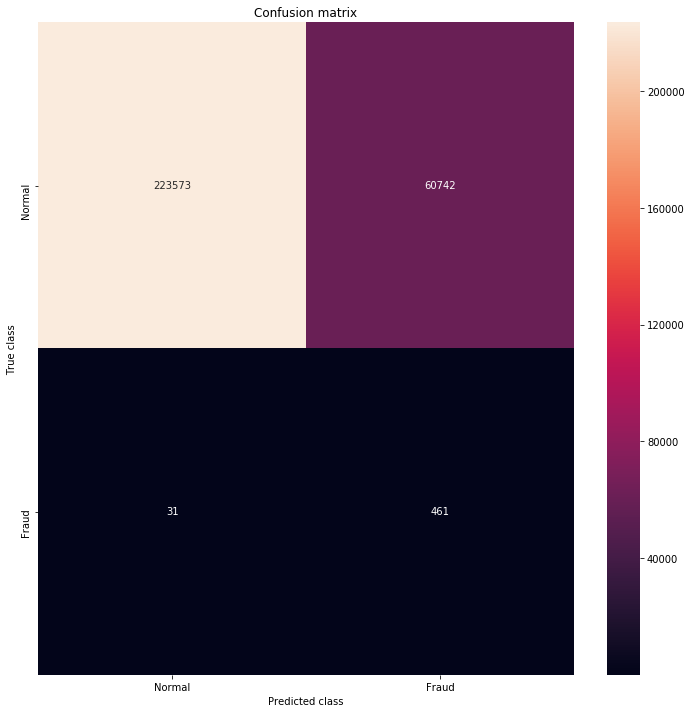

In [141]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [142]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [143]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(counter, truths)
print("AUC: {:.2%}".format (auc))

AUC: 50.37%
